![title](images.jpg)

## Overview

<p>In this notebook we will cover the following linear algorithms:</p>
    <ol>
        <li>Simple Linear Regression</li>
        <li>Multiple Linear Regression</li>
        <li>Ridge Regression</li>
        <li>Lasso Regression</li>
        <li>Polynimial Regression</li>
        <li>KNN Regression</li>
    </ol>
 <p>We are going to use the dataset has details of 6830 house entries with the following 16 features. Since house price is a continues variable, this is a regression problem.</p>
 <p>The data contains the columns:</p>
     <ul>
        <li>Rooms: Number of rooms</li>
        <li>Type: Property type</li>
        <li>Price: Price in dollars</li>
        <li>Method: Property status</li>
        <li>SellerG: Real Estate Agent</li>
        <li>Distance: Distance from CBD</li>
        <li>Postcode: Code of the area</li>
        <li>Bathroom: Number og Bathrooms</li>
        <li>Car: Number of Carspots</li>
        <li>Landsize: Land Size</li>
        <li>BuildingArea: Building Size</li>
        <li>YearBuilt: The Year in which home was built</li>
        <li>CoucilArea: Governing council for the area</li>
        <li>Longitude: The angular distance of a place east or west</li>
        <li>Regionname: General Region(West,North-West,North,Nort-east...etc)</li>
        <li>PropertyCount: Number of properties that exist in the suburb</li>
     </ul>

## Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

#### Check out the Data

In [49]:
housing = pd.read_csv("house.csv")

In [50]:
housing.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,2,0,1035000,1,23,2.5,3067,1,0,156,79.0,1900,31,144.9934,2,4019
1,3,0,1465000,3,23,2.5,3067,2,0,134,150.0,1900,31,144.9944,2,4019
2,4,0,1600000,4,155,2.5,3067,1,2,120,142.0,2014,31,144.9941,2,4019
3,3,0,1876000,1,155,2.5,3067,2,0,245,210.0,1910,31,144.9993,2,4019
4,2,0,1636000,1,155,2.5,3067,1,2,256,107.0,1890,31,144.9954,2,4019


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 16 columns):
Rooms            6830 non-null int64
Type             6830 non-null int64
Price            6830 non-null int64
Method           6830 non-null int64
SellerG          6830 non-null int64
Distance         6830 non-null float64
Postcode         6830 non-null int64
Bathroom         6830 non-null int64
Car              6830 non-null int64
Landsize         6830 non-null int64
BuildingArea     6830 non-null float64
YearBuilt        6830 non-null int64
CouncilArea      6830 non-null int64
Longtitude       6830 non-null float64
Regionname       6830 non-null int64
Propertycount    6830 non-null int64
dtypes: float64(3), int64(13)
memory usage: 853.9 KB


In [8]:
housing.describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6830.0,3.0,1.0,1.0,2.0,3.0,4.0,8.0
Type,6830.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0
Price,6830.0,1077604.0,673320.0,131000.0,630000.0,890000.0,1334000.0,9000000.0
Method,6830.0,1.0,1.0,0.0,1.0,1.0,1.0,4.0
SellerG,6830.0,132.0,77.0,0.0,73.0,135.0,194.0,267.0
Distance,6830.0,10.0,6.0,0.0,6.0,9.0,13.0,47.0
Postcode,6830.0,3104.0,91.0,3000.0,3044.0,3083.0,3147.0,3977.0
Bathroom,6830.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0
Car,6830.0,2.0,1.0,0.0,1.0,2.0,2.0,10.0
Landsize,6830.0,487.0,911.0,0.0,167.0,404.0,641.0,37000.0


In [11]:
housing.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [13]:
housing.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

<p>Great! we don't have any null values in our data.</p>

### Exploratory Data Analysis (EDA)
<p>Let's create some simple plots to check out the data!</p>

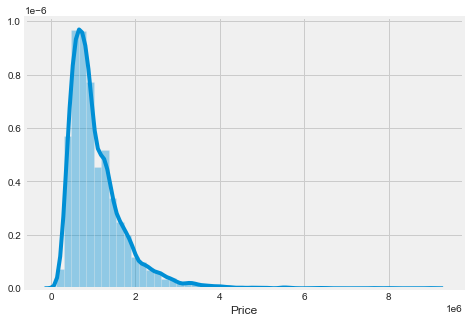

In [19]:
plt.figure(figsize=(7,5))
sns.distplot(housing['Price'])
plt.show()

<p>Positive skewness in target variable. </p>

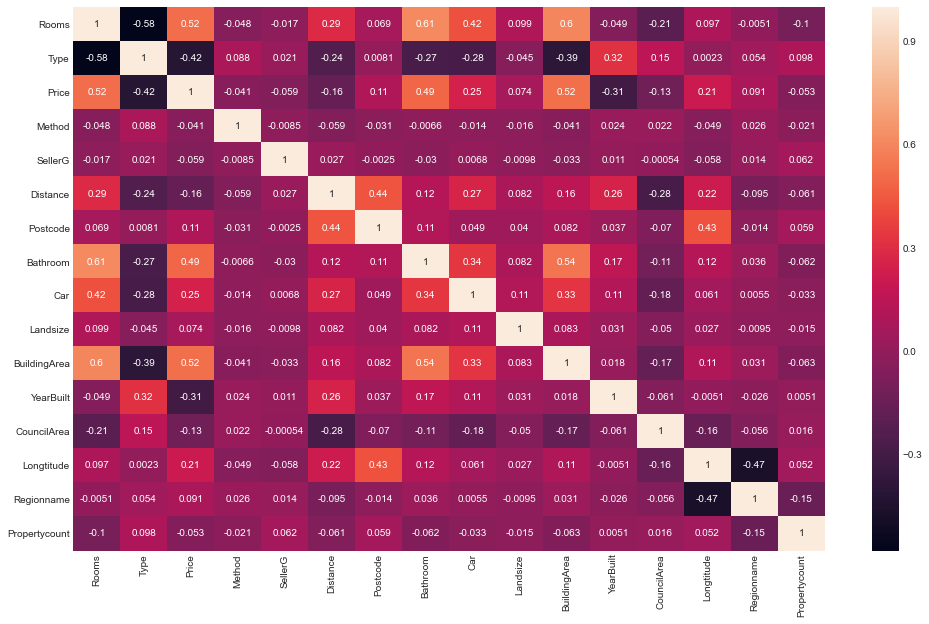

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(housing.corr(), annot=True)
plt.show()

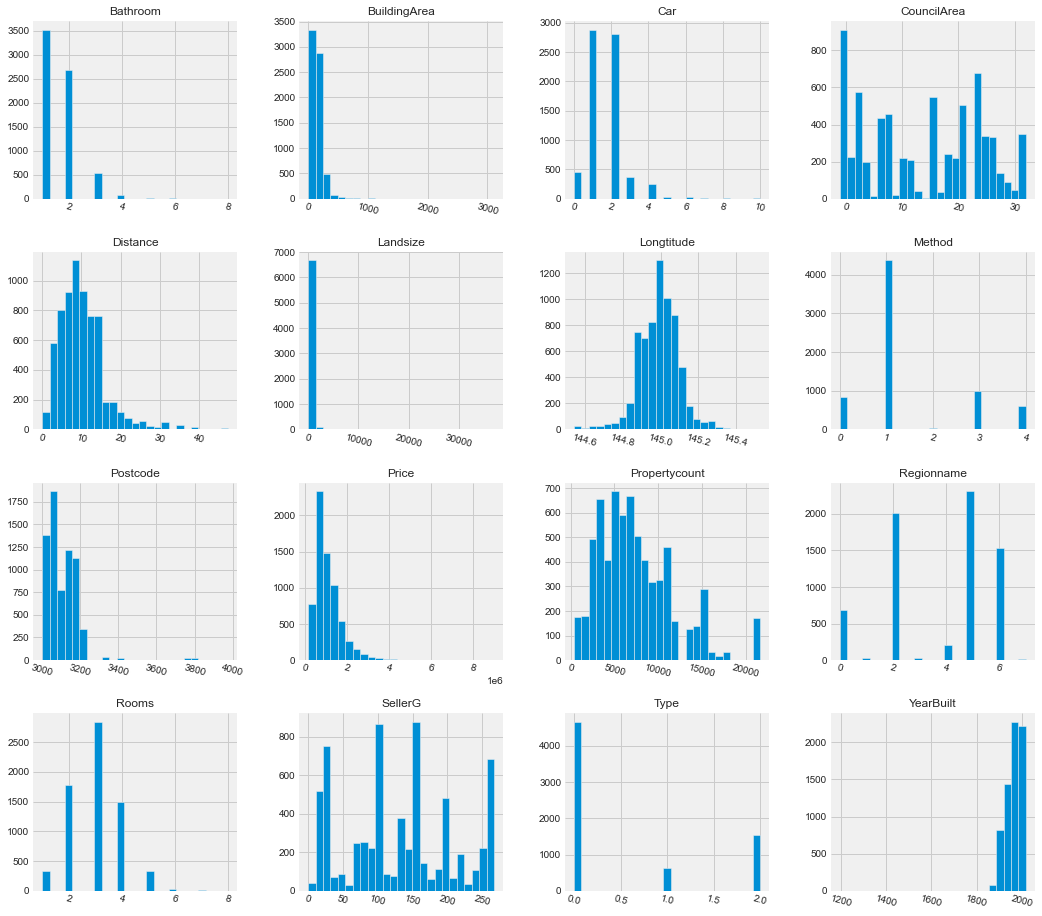

In [60]:
housing1 = housing[['Rooms', 'Type', 'Price', 'Method','SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Longtitude', 'Regionname', 'Propertycount']]
h = housing1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

<p>To determine bathroom,Type,Rooms or BuilgingArea vs price, I preferred boxplot to find outliers </p>

In [35]:
housing['Bathroom'].value_counts()

1    3524
2    2678
3     535
4      70
5      18
6       3
7       1
8       1
Name: Bathroom, dtype: int64

In [36]:
housing['Rooms'].value_counts()

3    2840
2    1784
4    1498
1     334
5     331
6      33
7       6
8       4
Name: Rooms, dtype: int64

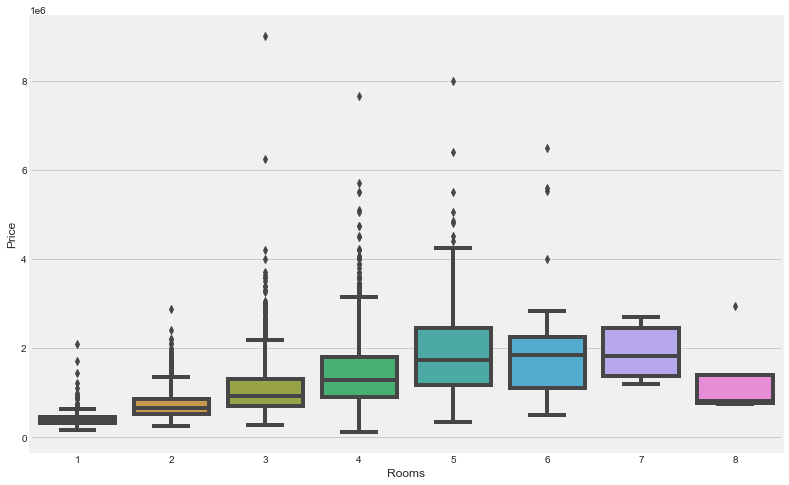

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(housing['Rooms'],housing['Price'])
plt.show()

#### Training a Linear Regression Model

<p>Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.</p>

#### X and y array

<p>We will toss out the SellerG and Regionname column because it only has text info that the linear regression model can't use</p>

In [51]:
X = housing[['Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Longtitude', 'Regionname', 'Propertycount']]
y = housing['Price']

### Train Test Split

<p>Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.</p>

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### 1. Linear Regression

In [54]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

#### Model Evaluation

In [55]:
# print the intercept
print(lin_reg.intercept_)

-212526301.93078822


In [56]:
coeff_df = pd.DataFrame(data=lin_reg.coef_, index=X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Rooms,1.136632e+05
Type,-1.572044e+05
Method,-7.815151e+03
SellerG,-1.120576e+02
Distance,-4.510394e+04
Postcode,1.031130e+03
Bathroom,2.040887e+05
Car,5.314524e+04
Landsize,3.044532e+01
BuildingArea,1.564376e+03


In [57]:
np.ceil(coeff_df)

,Coefficient
Rooms,113664.0
Type,-157204.0
Method,-7815.0
SellerG,-112.0
Distance,-45103.0
Postcode,1032.0
Bathroom,204089.0
Car,53146.0
Landsize,31.0
BuildingArea,1565.0


<p>Interpreting the coefficients: By obseving the coef of SellerG,Landsize and Propertycount has very less effect on price for Linear Regression. so we can remove on further operation if required.</p>

#### Predictions from our Model

In [58]:
pred = lin_reg.predict(X_test)

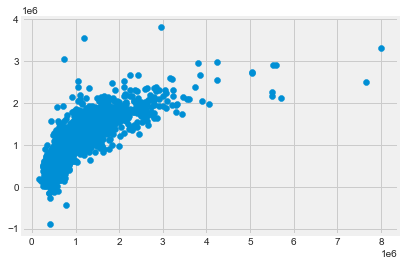

In [59]:
plt.scatter(y_test, pred)

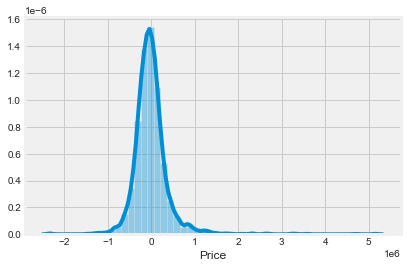

In [57]:
sns.distplot((y_test - pred), bins=50);

#### Regression Evaluation Metrics

In [60]:
print_evaluate(y_test, pred)

MAE: 257716.00314685635
MSE: 172886813943.61697
RMSE: 415796.60164991365
R2 Square 0.6217593786252815


In [90]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555979


<p>Huge difference in R2 square and Croos validation score. let see on other model too. </p>

### 2. Ridge Regression

<p>Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.</p>

In [66]:
for i in range(20):
    l2 = Ridge(i)
    l2.fit(X_train,y_train)
    print(l2.score(X_test,y_test))

0.6217593786252782
0.6218837202479865
0.62193948111209
0.6219386245258018
0.6218910078865186
0.6218047866777736
0.6216867333918974
0.6215424909317755
0.6213767751794619
0.6211935378544484
0.620996098148928
0.6207872496630623
0.6205693476877348
0.6203443807654485
0.6201140296090151
0.6198797158047125
0.6196426422226575
0.6194038266655981
0.6191641299815855
0.6189242796260478


In [63]:
model = Ridge(alpha=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

MAE: 257095.07344735967
MSE: 172804883947.46585
RMSE: 415698.06825082295
R2 Square 0.6219386245258018


In [91]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555979
1,Ridge Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555998


### 3. LASSO Regression

<p>A linear model that estimates sparse coefficients.</p>

In [71]:
for i in range(0,10,1):
    l1 = Lasso(i)
    l1.fit(X_train,y_train)
    print(l1.score(X_test,y_test))

0.6217593786252816
0.6217598076148798
0.6217602355895135
0.6217606628768857
0.6217610892748535
0.6217615148844932
0.6217619397058151
0.6217623637388131
0.6217627869834901
0.6217632094398495


In [65]:
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)


MAE: 257714.93060308127
MSE: 172886617860.38135
RMSE: 415796.365857593
R2 Square 0.6217598076148798


In [92]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555979
1,Ridge Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555998
2,Lasso Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555980


### 4. Polynomial Regression

<p>One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data</p>

In [67]:
X = housing[['Rooms', 'Type', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Longtitude']]
y = housing['Price']

In [68]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

print_evaluate(y_test, pred)

MAE: 220253.46785866068
MSE: 200582389831.8085
RMSE: 447864.2537999751
R2 Square 0.5611671819485782


In [93]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, pred),0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555979
1,Ridge Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555998
2,Lasso Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555980
3,Polynomail Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.000000


<h3>5. KNN Regression </h3> 

In [73]:
scaler = StandardScaler()

In [74]:
scaled_features = scaler.fit_transform(X)

In [75]:
scaled_features = pd.DataFrame(scaled_features,columns=X.columns)
scaled_features.head()

,Rooms,Type,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Longtitude
0,-1.008014,-0.649125,-1.276745,-0.408568,-0.831768,-1.701224,-0.716359,-1.709230,1.677666,0.014505
1,0.022481,-0.649125,-1.276745,-0.408568,0.568177,-1.701224,0.072845,-1.709230,1.677666,0.024031
2,1.052976,-0.649125,-1.276745,-0.408568,-0.831768,0.416199,-0.016080,1.314356,1.677666,0.021173
3,0.022481,-0.649125,-1.276745,-0.408568,0.568177,-1.701224,0.739777,-1.444003,1.677666,0.070709
4,-1.008014,-0.649125,-1.276745,-0.408568,-0.831768,0.416199,-0.405124,-1.974457,1.677666,0.033557


In [76]:
X = scaled_features
y = housing['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

<strong>Choosing a K Value that would best fit our model</strong>

In [101]:
error_rate = []

for i in range(1,11):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

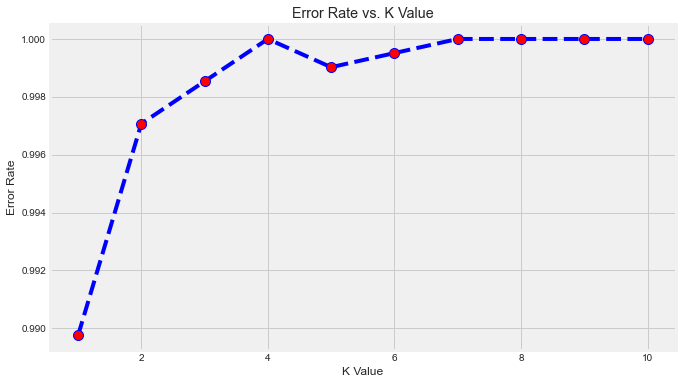

In [102]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [104]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print_evaluate(y_test, pred)

MAE: 255798.98291849683
MSE: 188102141590.74475
RMSE: 433707.4377858244
R2 Square 0.5884713860225232


In [105]:
results_df_2 = pd.DataFrame(data=[["KNN Regression", *evaluate(y_test, pred) , cross_val(KNeighborsClassifier())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555979
1,Ridge Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555998
2,Lasso Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.555980
3,Polynomail Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.000000
4,KNN Regression,255798.982918,1.881021e+11,433707.437786,0.588471,0.008785


### Summary:

<p>In this notebook you discovered the linear regression algorithm for machine learning.<p>

<p>You covered a lot of ground including:</p>
<ul>
<li>The common linear regression models (Ridge, Lasso,Polynomial, ...).</li>
<li>The representation used by the model.</li>
<li>Learning algorithms used to estimate the coefficients in the model.</li>
<li>Rules of thumb to consider when preparing data for use with linear regression.</li>
<li>How to evaluate a linear regression model.</li>
</ul>

### Conclusion:

<p>When we look at the evaluation table, 2nd degree polynomial (some features are included, no preprocessing) is the best. However, I have doubts about its reliability. I would prefer the  ridge/lasso regression  but other models might be useful depending to the situation too.</p>